<a href="https://colab.research.google.com/github/neetinds/Springboard/blob/master/18.3%20-%20California_HousingPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


# Acquire Housing dataset

In [6]:
#Read housing dataset
df_housing_dataset = pd.read_csv('/content/gdrive/MyDrive/Springboard-master/18.3 - California Housing Price Prediction/housing.csv')

In [7]:
df_housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [8]:
df_housing_dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [9]:
#Check shape of entire dataset
df_housing_dataset.shape

(20640, 10)

In [10]:
df_housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Visualize data to understand the relationship among variables

In [11]:
corr = df_housing_dataset.corr()

In [12]:
df_housing_dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


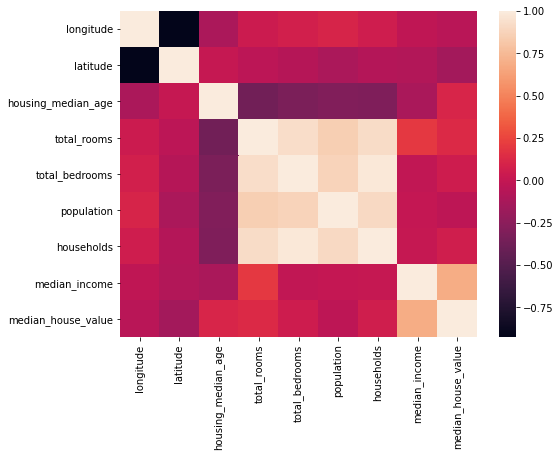

In [13]:
#Seaborn heatmap to view correlations between features in dataset
#Median income has a positive correlation against median house value
plt.figure(figsize=(8,6))
pltheatmap =sns.heatmap(corr)

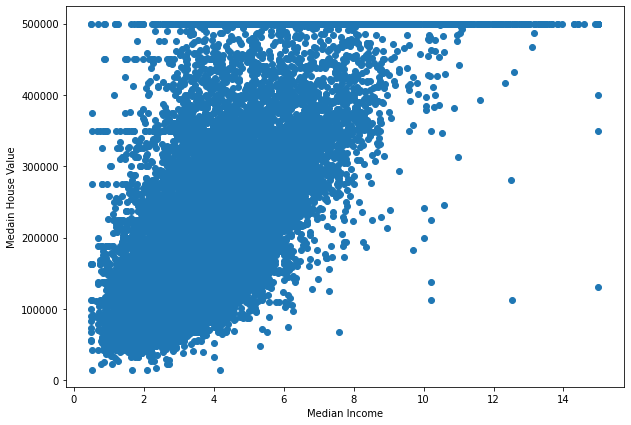

In [14]:
#Scatter plot of median income with median house value
plt.figure(figsize=(10,7))
plt.scatter(df_housing_dataset['median_income'],df_housing_dataset['median_house_value'])
plt.title='Scatter plot to correlate median income vs median house value'
plt.xlabel('Median Income')
plt.ylabel('Medain House Value')
plt.show()

In [15]:
df_housing_dataset.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
df_housing_dataset.ocean_proximity.isnull().sum()

0

In [17]:
#Slice dataset and store independent and dependent variables
X = df_housing_dataset.iloc[:,:-1].values
y = df_housing_dataset.iloc[:,9].values
print (X,y)

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']] [452600 358500 352100 ...  92300  84700  89400]


In [18]:
#Label Encode ocean proximity column
from sklearn.preprocessing import LabelEncoder
ocean_proximity_labelencoder = LabelEncoder()
X[:,8] =  ocean_proximity_labelencoder.fit_transform(X[:,8])

In [19]:
X[:,8]

array([3, 3, 3, ..., 1, 1, 1], dtype=object)

In [20]:
#Correlation between Ocean proximity and Median house value
corr1 = np.corrcoef(X[:,8].astype('float64'),y.astype('float64'))
print(corr1)

[[1.         0.08175023]
 [0.08175023 1.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


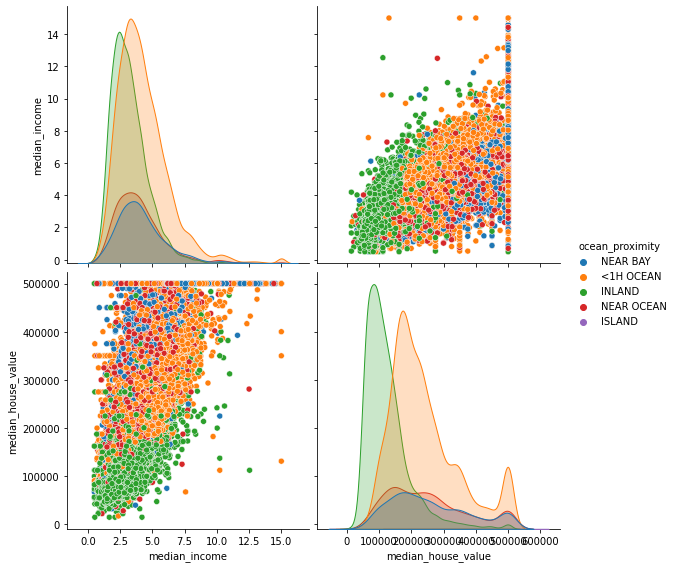

In [21]:
#Seaborn pairplot of median income vs median house value with hue as OCean Proximity
#hue="ocean_proximity"
sns.pairplot(df_housing_dataset, size=4 , 
             vars=["median_income","median_house_value"], hue="ocean_proximity")

# Handle missing values

In [22]:
df_housing_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [23]:
df_X = pd.DataFrame(X)

In [24]:
df_X.isnull().sum()

0      0
1      0
2      0
3      0
4    207
5      0
6      0
7      0
8      0
dtype: int64

In [31]:
#==============================================================================
# Handle the missing values, we can see that in dataset there are some missing
# values, we will use strategy to impute mean of column values in these places
#==============================================================================
from sklearn.impute import SimpleImputer
missingValueImputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#from sklearn.preprocessing import Imputer
# First create an Imputer
#missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean', axis = 0)
# Set which columns imputer should perform
missingValueImputer = missingValueImputer.fit (X[:,4:5])
# update values of X with new values
X[:,4:5] = missingValueImputer.transform(X[:,4:5])

In [32]:
#Notice missing values in total bedrooms column have been imputed with mean of total bedrooms
df_X = pd.DataFrame(X)
df_X.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

# Principal Component Analysis

In [33]:
X.shape

(20640, 9)

In [34]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
X_std = stdsclr.fit_transform(X)
print('Array:', X_std)
print('Datatype:', X_std.dtype)

Array: [[-1.32783522  1.05254828  0.98214266 ... -0.97703285  2.34476576
   1.2910888 ]
 [-1.32284391  1.04318455 -0.60701891 ...  1.66996103  2.33223796
   1.2910888 ]
 [-1.33282653  1.03850269  1.85618152 ... -0.84363692  1.7826994
   1.2910888 ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.17404163 -1.14259331
  -0.11673923]
 [-0.87362627  1.77823747 -0.84539315 ... -0.39375258 -1.05458292
  -0.11673923]
 [-0.83369581  1.75014627 -1.00430931 ...  0.07967221 -0.78012947
  -0.11673923]]
Datatype: float64


In [35]:
#PCA
#from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
PCA = PCA(n_components = 6)

principal_components = PCA.fit_transform(np.nan_to_num(X_std.astype(np.float32)))

In [36]:
principal_components

array([[-2.157205  ,  1.7022551 ,  1.8547902 ,  1.70382   ,  0.70465815,
         0.14044653],
       [ 2.8726313 ,  2.3047156 ,  1.9782218 ,  1.4563941 ,  0.22587822,
        -0.38226983],
       [-2.0351934 ,  1.7918687 ,  0.9710006 ,  1.8944466 ,  1.262508  ,
         0.04699718],
       ...,
       [-0.45516002,  1.6384034 , -0.31194416, -1.5194823 , -0.8195122 ,
        -0.24827652],
       [-0.8670745 ,  1.6194118 , -0.20800507, -1.4886584 , -0.7902067 ,
        -0.2842094 ],
       [ 0.13316679,  1.6848016 , -0.05225432, -1.3684319 , -0.6874925 ,
        -0.1704582 ]], dtype=float32)

In [37]:
#Cal the cumulative proportion of var explained by each component
PCA.explained_variance_ratio_

array([0.43398127, 0.22466934, 0.11957179, 0.10398562, 0.08531697,
       0.01648695], dtype=float32)

In [38]:
df_X = pd.DataFrame(X)
print(df_X.columns)

RangeIndex(start=0, stop=9, step=1)


In [39]:
df_housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [40]:
# Dump components relations with features: This gives us the picture of how features are related to components
print(pd.DataFrame(PCA.components_,columns=df_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6']))

             0         1         2  ...         6         7         8
PC-1  0.081447 -0.077766 -0.219732  ...  0.490642  0.045539 -0.041798
PC-2 -0.670071  0.655264  0.033190  ...  0.074866 -0.032873  0.317125
PC-3 -0.089343  0.065995 -0.428609  ... -0.113064  0.856745 -0.148637
PC-4  0.110276 -0.277884  0.419474  ...  0.041822  0.377070  0.763564
PC-5 -0.140913  0.061118  0.762079  ...  0.078822  0.290294 -0.535140
PC-6 -0.113469 -0.073867 -0.042409  ... -0.123977  0.052332  0.039624

[6 rows x 9 columns]


In [41]:
principal_components.shape

(20640, 6)

# Machine Learning Model Selection and Training

In [42]:
#Let's check our target label
y

array([452600, 358500, 352100, ...,  92300,  84700,  89400])

In [43]:
#Split Dataset for model training and testing [80/20 split]
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(principal_components,y, test_size=0.1,random_state=1)

In [44]:
X_train.shape

(18576, 6)

# Linear Regression ML Model

In [45]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
linReg.predict(X_test)

array([216366.45, 141489.31, 236970.62, ..., 407407.16, 208935.92,
       199176.1 ], dtype=float32)

In [47]:
#Quick check accuracy of the model
score = linReg.score(X_train,y_train)
print(score)

0.541548743039721


In [48]:
#Quick check accuracy of the model
score = linReg.score(X_test,y_test)
print(score)

0.5350363359741281


In [49]:
linreg_predictions = linReg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,linreg_predictions))
#RMSE below

79078.20503809868

# Decision Tree ML model

In [50]:
#Train with DT model
from sklearn.tree import DecisionTreeRegressor
DTRegressor = DecisionTreeRegressor(max_depth=9, min_samples_split=5)
DTRegressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
#Quick check accuracy of the model
score = DTRegressor.score(X_train,y_train)
print(score)

0.7538788920368392


In [52]:
#Quick check accuracy of the model
score = DTRegressor.score(X_test,y_test)
print(score)

0.6315890711693903


In [53]:
DTR_predictions = DTRegressor.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,DTR_predictions))
#RMSE below

70385.73266534702

# Random Forest ML Model - Model prediction accuracy is good compared to LR and DT models

In [55]:
#Declare hyper parameters to tune RF model
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1],
                  'randomforestregressor__min_samples_split': [2, 5],
                  'randomforestregressor__min_samples_leaf': [10, 5]}

In [56]:
#Make a Random forest pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(RandomForestRegressor(n_estimators=50))

In [57]:
#Cross Validation to find best parameters
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
clf = GridSearchCV(pipeline, hyperparameters, cv=10)


In [58]:
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                     

In [60]:
clf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 5,
 'randomforestregressor__min_samples_split': 5}

In [61]:
clf.best_score_

0.7434205863022637

In [62]:
clf.best_estimator_

Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=5, min_samples_split=5,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=50, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [63]:
#Quick check accuracy of the model after CV
score = clf.score(X_train,y_train)
print(score)

0.8785676217581673


In [64]:
#Quick check accuracy of the model
score = clf.score(X_test,y_test)
print(score)

0.7391845179814752


In [65]:
X_test

array([[ 0.16535653, -1.0640981 , -0.649095  , -0.10464208,  0.8615815 ,
        -0.5227487 ],
       [-0.6298124 ,  0.38872236, -1.0229844 , -0.3774178 ,  0.2636407 ,
        -0.16050445],
       [-0.94940645,  1.9811714 , -0.50598264,  1.1130514 ,  0.58667994,
         0.4323708 ],
       ...,
       [ 9.943532  , -0.33379817, -0.03628929,  0.5420256 , -0.30348524,
        -4.7720094 ],
       [-1.8716722 , -1.5379366 , -0.01383329, -0.23525523,  0.41688454,
        -0.09706558],
       [-1.538447  ,  1.2624468 ,  0.47594973, -0.6197618 ,  0.1091387 ,
        -0.04103313]], dtype=float32)

In [66]:
RF_predictions = clf.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,RF_predictions))
#RMSE below for the 10% test set [unseen data]

59222.27231944419

# ML Model Training with only Median income feature to predict housing value

In [68]:
#Let's train the model only with median income and check how model behaves
X

array([[-122.23, 37.88, 41, ..., 126, 8.3252, 3],
       [-122.22, 37.86, 21, ..., 1138, 8.3014, 3],
       [-122.24, 37.85, 52, ..., 177, 7.2574, 3],
       ...,
       [-121.22, 39.43, 17, ..., 433, 1.7, 1],
       [-121.32, 39.43, 18, ..., 349, 1.8672, 1],
       [-121.24, 39.37, 16, ..., 530, 2.3886, 1]], dtype=object)

In [69]:
df_X_final = pd.DataFrame(X)
df_X_final.head()

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41,880,129,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190,496,177,7.2574,3
3,-122.25,37.85,52,1274,235,558,219,5.6431,3
4,-122.25,37.85,52,1627,280,565,259,3.8462,3


In [70]:
X = np.delete(X,[0,1,2,3,4,5,6,8],axis=1)

In [71]:
X

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7],
       [1.8672],
       [2.3886]], dtype=object)

In [74]:
#Split Dataset for model training and testing [80/20 split]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/4,random_state=0)

#from sklearn.cross_validation import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/4,random_state=0)

In [75]:
X_train.shape

(15480, 1)

In [76]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
X_train_std = stdsclr.fit_transform(X_train)

In [77]:
#Feature Scaling
X_test_std = stdsclr.fit_transform(X_test)

In [78]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
linReg1 = LinearRegression()
linReg1.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#Quick check accuracy of the model
score = linReg1.score(X_train_std,y_train)
print(score)

0.48061930819884535


In [80]:
#Quick check accuracy of the model
score = linReg1.score(X_test_std,y_test)
print(score)

0.45147717106069024


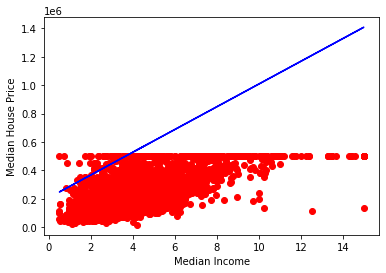

In [81]:
#==============================================================================
# Visualize the linear regressor algo outcome
#==============================================================================
# Visualising the Regression results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, linReg1.predict(X_test), color = 'blue')
#plt.title('Median House Price Prediction')
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.show()

In [82]:
# Fitting the Polynomial Regression algorithm to the Training set

from sklearn.preprocessing import PolynomialFeatures
polyagent = PolynomialFeatures(degree=5)
X_Poly = polyagent.fit_transform(X_train)

In [83]:
linReg1.fit (X_Poly, y_train ) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
X_Poly_test = polyagent.fit_transform(X_test)

In [85]:
score = linReg1.score(X_Poly,y_train)
print(score)

0.49275884336146475


In [86]:
score = linReg1.score(X_Poly_test,y_test)
print(score)

0.46653755542285047


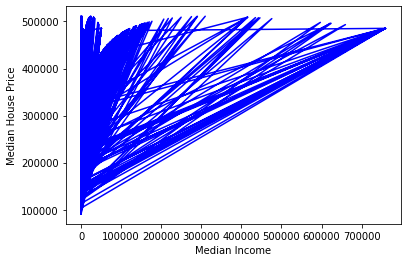

In [87]:

# Visualize the poly regressor algo outcome
# Visualising the Regression results
#plt.scatter(X_Poly_test, y_test, color = 'red')
plt.plot(X_Poly_test, linReg1.predict(X_Poly_test), color = 'blue')
#plt.title('Median House Price Prediction')
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.show()

In [88]:
#Let's fit DT Reg

from sklearn.tree import DecisionTreeRegressor 
DTRegressor = DecisionTreeRegressor(max_depth=3)
DTRegressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [89]:
#Quick check accuracy of the model on train
score = DTRegressor.score(X_train,y_train)
print(score)

0.48925102276025023


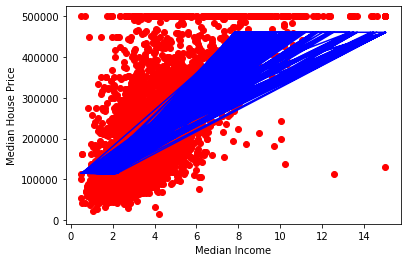

In [90]:

# Visualize the DT regressor algo outcome

# Visualising the Regression results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, DTRegressor.predict(X_test), color = 'blue')
#plt.title('Median House Price Prediction')
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.show()